<a href="https://colab.research.google.com/github/shubham-senani/Airbnb-Clone/blob/main/MA9_Perceptual_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptual Mapping

In [ ]:
import io
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

from sklearn.preprocessing import MinMaxScaler

#!pip install prince
import prince

In [ ]:
# =========================
# DATA INPUT OPTIONS
# =========================

print("Choose how you want to provide the dataset:")
print("1 → Upload CSV file (from your computer)")
print("2 → Load Google Sheet (as CSV)")

choice = input("Enter 1 or 2: ")

# -----------------------------------
# OPTION 1: Upload CSV manually
# -----------------------------------
if choice == "1":
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

    print(f"File '{filename}' uploaded successfully.")

# -----------------------------------
# OPTION 2: Read Google Sheet as CSV
# -----------------------------------
elif choice == "2":
    #GOOGLE_SHEET_ID = "1jn6XDo3jTrcWQV4QYFS_QukKNZPHBAh-"
    GOOGLE_SHEET_ID = input("Enter the Google Sheet ID: ").strip()
    DATA_URL = f"https://docs.google.com/uc?id={GOOGLE_SHEET_ID}&export=download"

    df = pd.read_csv(DATA_URL)
    print("Google Sheet loaded successfully.")

# -----------------------------------
# INVALID CHOICE
# -----------------------------------
else:
    raise ValueError("Invalid choice. Please rerun the cell and enter 1 or 2.")

# =========================
# DATA CHECK
# =========================
print("\nDataset shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()

Choose how you want to provide the dataset:
1 → Upload CSV file (from your computer)
2 → Load Google Sheet (as CSV)
Enter 1 or 2: 2
Enter the Google Sheet ID: 1jn6XDo3jTrcWQV4QYFS_QukKNZPHBAh-
Google Sheet loaded successfully.

Dataset shape: (521, 34)
Columns: ['Panelist', 'Product', 'Ease_of_Rod_Insertion', 'Taste_Intensity', 'Impact', 'Irritation', 'Aerosol_Warmth', 'Visible_Aerosol', 'Added_Flavour_Amplitude', 'Menthol_Intensity', 'Mint_Intensity', 'Cardboard/Paper', 'Bread/Cereal/Popcorn', 'Spicy', 'Sweet', 'Sour', 'Bitter', 'Bright_Tobacco', 'Earthy_Tobacco', 'Dark_Tobacco', 'Aromatic_tobacco', 'Overall_Tobacco_Taste_Intensity', 'Impact.1', 'Irritation.1', 'Draw_Resistance', 'Peppery/Tingly', 'Aerosol_Volume', 'Aerosol_Body', 'Amount_of_Visible_Aerosol', 'Cooling', 'Metallic', 'Chemical/Sulphur', 'Ease_Of_Stick_Removal', 'Overall_Aftertaste_Intensity']


,Panelist,Product,Ease_of_Rod_Insertion,Taste_Intensity,Impact,Irritation,Aerosol_Warmth,Visible_Aerosol,Added_Flavour_Amplitude,Menthol_Intensity,...,Draw_Resistance,Peppery/Tingly,Aerosol_Volume,Aerosol_Body,Amount_of_Visible_Aerosol,Cooling,Metallic,Chemical/Sulphur,Ease_Of_Stick_Removal,Overall_Aftertaste_Intensity
0,Ex211,C456,7,5,6,7,3,3,0,0,...,1,5,3,3,3,0,0,0,10,3
1,Ex211,F654,8,5,6,7,0,2,6,7,...,1,4,3,3,3,7,0,0,10,4
2,Ex211,G258,8,9,7,8,0,4,8,8,...,1,4,4,4,4,8,0,0,9,5
3,Ex211,K753,7,6,6,7,0,3,0,6,...,1,4,4,4,3,6,0,0,10,4
4,Ex211,L951,8,6,6,7,0,2,6,5,...,1,4,4,4,3,5,0,0,9,4


### Two-Attribute Map

In [ ]:
# ----------------------------------
# Indian soft drink brands
# ----------------------------------
brands = [
    "Coca-Cola",
    "Pepsi",
    "Kapiva",
    "Paper Boat",
    "Appy Fizz"
]

# Perceptual scores (example survey means)
# Scale: 1 (Low) to 10 (High)

health = [4, 4, 8, 7, 6]   # Health perception
taste  = [8, 7, 3, 6, 5]   # Taste preference

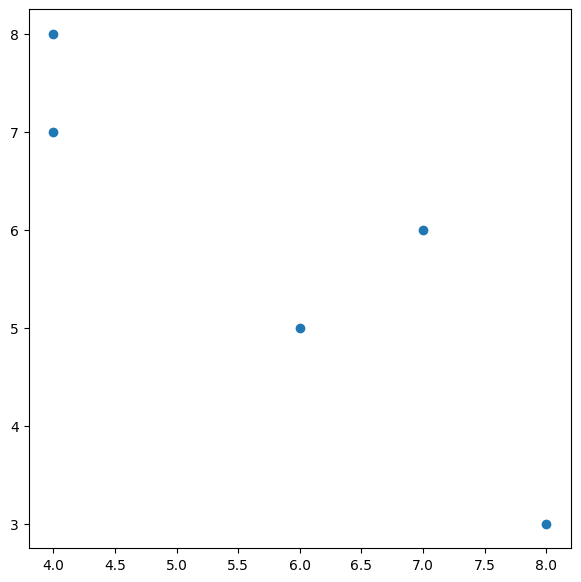

In [ ]:
# ----------------------------------
# Plot perceptual map
# ----------------------------------
plt.figure(figsize=(7, 7))
plt.scatter(health, taste)

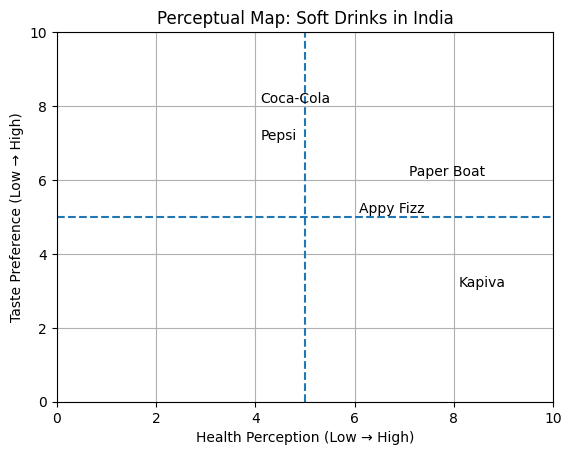

In [ ]:
# Label each brand
for i, brand in enumerate(brands):
    plt.text(health[i] + 0.1, taste[i] + 0.1, brand)

# Axis labels
plt.xlabel("Health Perception (Low → High)")
plt.ylabel("Taste Preference (Low → High)")

# Title
plt.title("Perceptual Map: Soft Drinks in India")

# Quadrant lines (average perception)
plt.axhline(5, linestyle="--")
plt.axvline(5, linestyle="--")

# Limits for clarity
plt.xlim(0, 10)
plt.ylim(0, 10)

# Grid
plt.grid(True)

plt.show()

### Multi Dimensional Scaling

In [ ]:
# =========================
# BASIC DATA CHECK
# =========================

data = df.copy()

print("Dataset shape:", data.shape)
print("Columns:", list(data.columns))

Dataset shape: (521, 34)
Columns: ['Panelist', 'Product', 'Ease_of_Rod_Insertion', 'Taste_Intensity', 'Impact', 'Irritation', 'Aerosol_Warmth', 'Visible_Aerosol', 'Added_Flavour_Amplitude', 'Menthol_Intensity', 'Mint_Intensity', 'Cardboard/Paper', 'Bread/Cereal/Popcorn', 'Spicy', 'Sweet', 'Sour', 'Bitter', 'Bright_Tobacco', 'Earthy_Tobacco', 'Dark_Tobacco', 'Aromatic_tobacco', 'Overall_Tobacco_Taste_Intensity', 'Impact.1', 'Irritation.1', 'Draw_Resistance', 'Peppery/Tingly', 'Aerosol_Volume', 'Aerosol_Body', 'Amount_of_Visible_Aerosol', 'Cooling', 'Metallic', 'Chemical/Sulphur', 'Ease_Of_Stick_Removal', 'Overall_Aftertaste_Intensity']


In [ ]:
# =========================
# DATA PREPARATION
# =========================

# Columns not used for MDS
id_columns = ["Panelist", "Product"]

# Keep only perceptual attributes
attributes = data.drop(columns=id_columns)

# Aggregate panelist ratings to product-level means
product_means = data.groupby("Product")[attributes.columns].mean()

print("\nProduct-level dataset shape:", product_means.shape)


# DATA STANDARDIZATION
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_means)


Product-level dataset shape: (12, 32)


In [ ]:
# =========================
# MULTIDIMENSIONAL SCALING
# =========================

mds = MDS(
    n_components=2,
    dissimilarity="euclidean",
    random_state=42
)

mds_coordinates = mds.fit_transform(scaled_data)

mds_df = pd.DataFrame(
    mds_coordinates,
    columns=["Dimension 1", "Dimension 2"],
    index=product_means.index
)

print("\nMDS Stress:", mds.stress_)


MDS Stress: 262.9463357696326


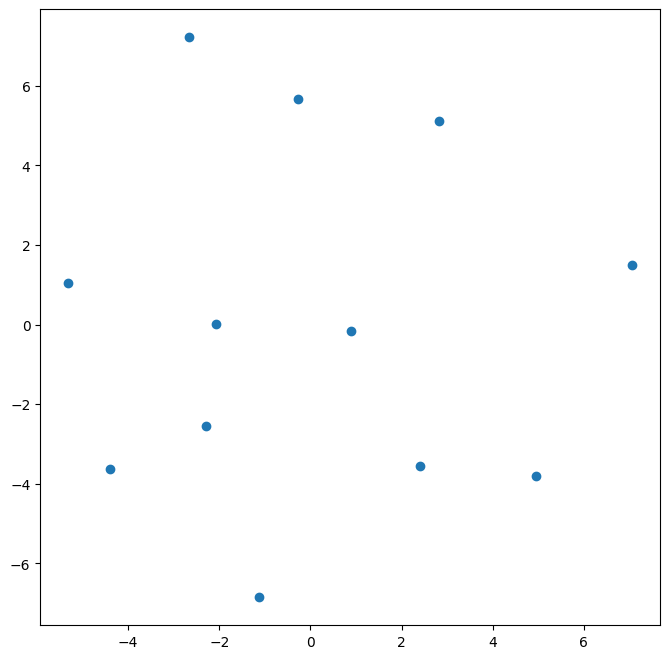

In [ ]:
# =========================
# PERCEPTUAL MAP VISUALIZATION
# =========================

plt.figure(figsize=(8, 8))
plt.scatter(mds_df["Dimension 1"], mds_df["Dimension 2"])

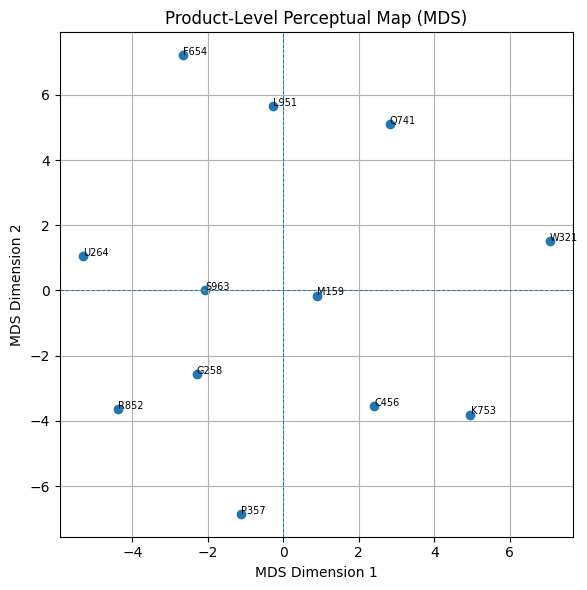

In [ ]:
# =========================
# PERCEPTUAL MAP VISUALIZATION (COLAB STABLE)
# =========================

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(mds_df["Dimension 1"], mds_df["Dimension 2"])

for product in mds_df.index:
    ax.text(
        mds_df.loc[product, "Dimension 1"] + 0.005,
        mds_df.loc[product, "Dimension 2"] + 0.005,
        product,
        fontsize=7
    )

ax.axhline(0, linestyle="--", linewidth=0.7)
ax.axvline(0, linestyle="--", linewidth=0.7)

ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")
ax.set_title("Product-Level Perceptual Map (MDS)")

ax.grid(True)
plt.tight_layout()
plt.show()


### Correpondence Analysis

In [ ]:
# =========================
# DATA PREPARATION
# =========================

# Load data
data = df.copy()

# Drop ID columns
attributes = data.drop(columns=["Panelist", "Product"])

# Aggregate to product level
product_means = data.groupby("Product")[attributes.columns].mean()

In [ ]:
# =========================
# CA COMPATIBLE TRANSFORMATION
# =========================

# Scale values to positive range
scaler = MinMaxScaler()
product_scaled = pd.DataFrame(
    scaler.fit_transform(product_means),
    index=product_means.index,
    columns=product_means.columns
)

# Add small constant to avoid zeros
product_scaled = product_scaled + 1e-6

In [ ]:
# =========================
# CORRESPONDENCE ANALYSIS
# =========================

ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine="sklearn",
    random_state=42
)

ca = ca.fit(product_scaled)

In [ ]:
# =========================
# COORDINATE EXTRACTION
# =========================

# Row coordinates (Products)
row_coords = ca.row_coordinates(product_scaled)

# Column coordinates (Attributes)
col_coords = ca.column_coordinates(product_scaled)

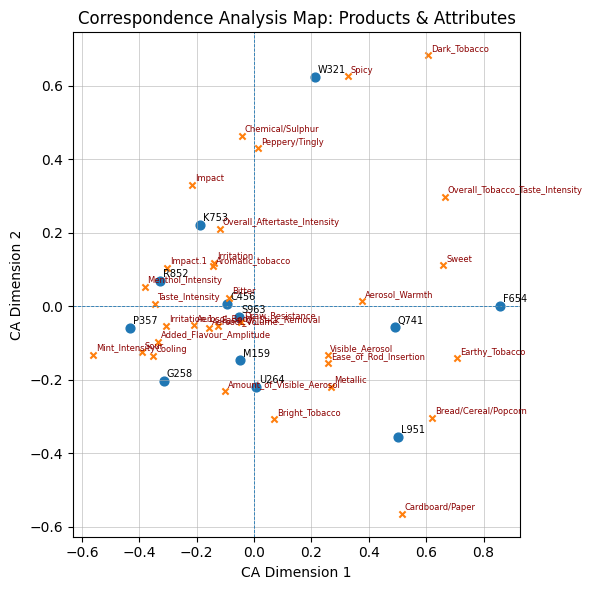

In [ ]:
# =========================
# CA BIPLOT (COLAB OPTIMISED)
# =========================

fig, ax = plt.subplots(figsize=(6, 6))

# Products
ax.scatter(row_coords[0], row_coords[1], s=40)
for i in row_coords.index:
    ax.text(
        row_coords.loc[i, 0] + 0.01,
        row_coords.loc[i, 1] + 0.01,
        i,
        fontsize=7
    )

# Attributes
ax.scatter(col_coords[0], col_coords[1], s=20, marker="x")
for i in col_coords.index:
    ax.text(
        col_coords.loc[i, 0] + 0.01,
        col_coords.loc[i, 1] + 0.01,
        i,
        fontsize=6,
        color="darkred"
    )

ax.axhline(0, linestyle="--", linewidth=0.6)
ax.axvline(0, linestyle="--", linewidth=0.6)

ax.set_title("Correspondence Analysis Map: Products & Attributes")
ax.set_xlabel("CA Dimension 1")
ax.set_ylabel("CA Dimension 2")

ax.grid(True, linewidth=0.4)
plt.tight_layout()
plt.show()